In [2]:
# import libraries
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt, matplotlib.image as mpimg
#import statsmodels.api as sm

#from sklearn import datasets
#from sklearn.model_selection import train_test_split , KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
#from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [7]:
#read csv file
text_df = pd.read_csv("dataset.csv")
print("Length of data is ",len(text_df))

Length of data is  42000


In [8]:
#null value check
text_df.isna().any().any()

False

In [9]:
#data view
text_df.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [10]:
#outlier check using describe
text_df.describe()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,4.456643,0.171357,0.164476,1.192833,28.043952,36.084976,42.713952,46.092310,44.542452,38.948524,...,42.461048,102.124119,107.683952,79.750548,56.31481,39.244643,25.754262,14.858619,5.844476,0.829643
std,2.887730,5.726352,5.515774,14.692403,70.505431,78.631145,84.390533,87.287033,85.740313,81.223946,...,85.090524,110.961953,111.360981,104.287852,94.20847,82.799118,69.597297,54.018163,33.293343,11.818307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,29.000000,21.000000,0.000000,...,10.000000,247.000000,250.000000,191.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


[Text(0.5, 1.0, 'Balance Check'), Text(0.5, 0, 'Label'), Text(0, 0.5, 'Count')]

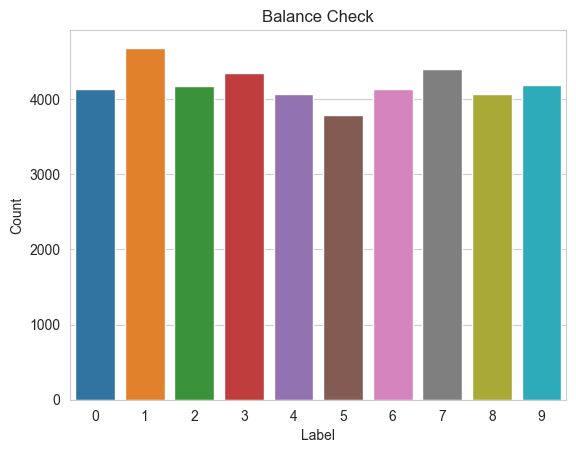

In [12]:
#distribution of labels
sns.countplot(x=text_df["label"]).set(title='Balance Check', xlabel='Label', ylabel='Count')

In [15]:
#train test split
X = text_df.drop(['label'],axis=1)
Y = text_df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

In [16]:
#normalizing data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
#encoding labels
Y_train_encoded = np.array(Y_train, dtype=np.int32)
Y_test_encoded = np.array(Y_test, dtype=np.int32)

[Text(0.5, 1.0, 'Accuracy Plot'),
 Text(0.5, 0, 'Nearest Neighbour'),
 Text(0, 0.5, 'Accuracy Metric')]

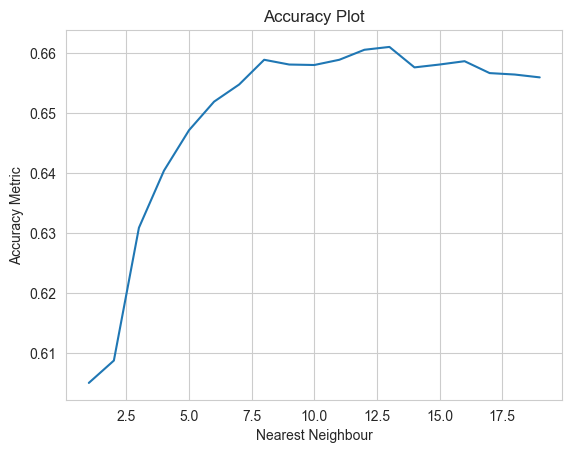

In [18]:
#K value selection
neighbors=np.arange(1,20)
accuracy_list=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,Y_train_encoded)
    knn.predict(X_test_scaled)
    accuracy_list[i]=knn.score(X_test_scaled,Y_test_encoded)

sns.lineplot(x=neighbors, y=accuracy_list).set(title='Accuracy Plot', xlabel='Nearest Neighbour', ylabel='Accuracy Metric')

In [19]:
#Accuracy value for all Value of K
k_range=list(range(1,20))
acc=[]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, Y_train_encoded)
    Y_pred = knn.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(Y_test_encoded, Y_pred))
acc

[0.6050313467185144,
 0.6087612094278232,
 0.6309023093405285,
 0.6404253630664233,
 0.6471708594555987,
 0.6519323863185461,
 0.6547893024363146,
 0.658915959050869,
 0.6581223712403778,
 0.6580430124593286,
 0.658915959050869,
 0.6605824934529005,
 0.6610586461391953,
 0.657646218554083,
 0.6581223712403778,
 0.6586778827077217,
 0.6566939131814935,
 0.6564558368383462,
 0.6559796841520514]

In [20]:
#model using best n = 12
knn = KNeighborsClassifier(n_neighbors=12).fit(X_train_scaled, Y_train_encoded)
y_pred = knn.predict(X_test_scaled)

In [21]:
# model accuracy
metrics.accuracy_score(Y_test_encoded,y_pred)

0.6605824934529005

In [22]:
#classification report
print(classification_report(Y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1316
           1       0.78      0.95      0.85      1415
           2       0.65      0.61      0.63      1193
           3       0.59      0.55      0.57      1309
           4       0.71      0.53      0.61      1198
           5       0.69      0.53      0.60      1170
           6       0.82      0.89      0.85      1268
           7       0.45      0.66      0.53      1261
           8       0.63      0.51      0.56      1189
           9       0.48      0.42      0.45      1282

    accuracy                           0.66     12601
   macro avg       0.66      0.65      0.65     12601
weighted avg       0.66      0.66      0.66     12601



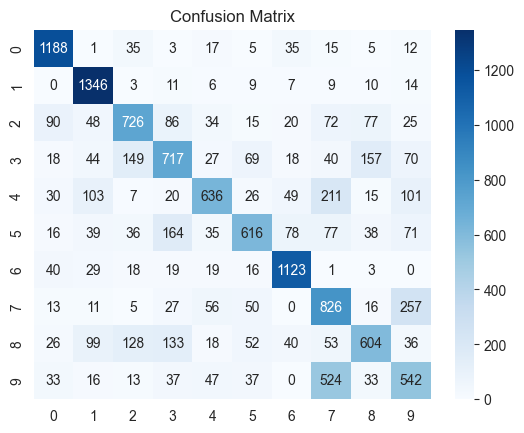

In [23]:
#Confusion Matrix
cm = confusion_matrix(Y_test_encoded, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g').set_title("Confusion Matrix")
plt.show()

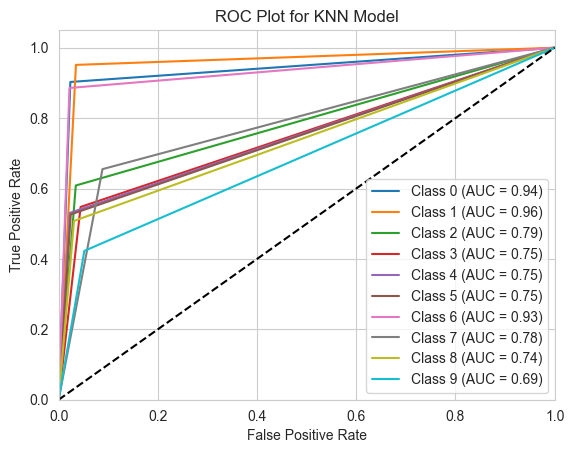

In [25]:
#Multi Class ROC Plot

# Binarize the true labels for computing ROC for each class
y_true_bin = label_binarize(Y_test_encoded, classes=[0,1,2,3,4,5,6,7,8,9])
y_pred_bin = label_binarize(y_pred, classes=[0,1,2,3,4,5,6,7,8,9])

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for KNN Model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#hyperparameter tuning to decide model parameters
param_grid = {
    'hidden_layer_sizes': [(2,4)],
    'activation': ['relu', 'logistic','tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd'],
    'max_iter': [5000,10000]
}

mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train_encoded)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

In [29]:
#build model
mlp = MLPClassifier((8,16), solver='adam',activation='logistic',learning_rate_init=0.01,max_iter=100000)
mlp.fit(X_train_scaled,Y_train_encoded)

MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 16),
              learning_rate_init=0.01, max_iter=100000)

In [30]:
mlp.score(X_test_scaled,Y_test_encoded)

0.657646218554083

In [32]:
y_pred = mlp.predict(X_test_scaled)
print("Model Accuracy = ", round(accuracy_score(Y_test_encoded,y_pred),3))
print(classification_report(Y_test_encoded, y_pred))

Model Accuracy =  0.658
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1316
           1       0.82      0.94      0.88      1415
           2       0.66      0.58      0.62      1193
           3       0.57      0.54      0.55      1309
           4       0.68      0.55      0.61      1198
           5       0.57      0.57      0.57      1170
           6       0.82      0.90      0.86      1268
           7       0.49      0.58      0.53      1261
           8       0.64      0.48      0.54      1189
           9       0.47      0.50      0.49      1282

    accuracy                           0.66     12601
   macro avg       0.65      0.65      0.65     12601
weighted avg       0.66      0.66      0.65     12601



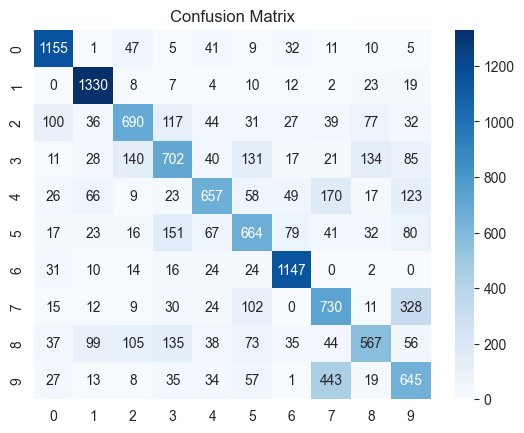

In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test_encoded, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g').set_title("Confusion Matrix")
plt.show()

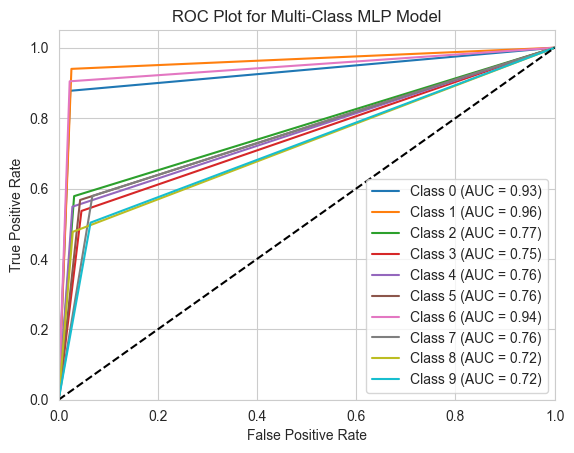

In [35]:
#Multi Class ROC Plot
# Binarize the true labels for computing ROC for each class
y_true_bin = label_binarize(Y_test_encoded, classes=[0,1,2,3,4,5,6,7,8,9])
y_pred_bin = label_binarize(y_pred, classes=[0,1,2,3,4,5,6,7,8,9])

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for Multi-Class MLP Model')
plt.legend(loc="lower right")
plt.show()